In [ ]:
#Importing all necessary packages
%matplotlib inline
import re
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

#Nltk resource downloading
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Mounting Drive
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
Mounted at /content/drive/


In [ ]:
import data_loading as dl

importing Jupyter notebook from /nbs/data_loading.ipynb


**Pre Processing Functions**


In [ ]:
 # Declaring Regular Expression
url_reg_expr = re.compile(r'https?://\S+|www\.\S+')
html_reg_expr = re.compile(r'<.*?>')
emoji_reg_expr = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
shortword_reg_expr = re.compile(r'\W*\b\w{1,3}\b')

def remove_noise(sentence):
    if not pd.isna(sentence):
        #Remove White-Space characters
        sentence = sentence.strip()
        #Remove Punctuations
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        #Remove Urls
        sentence = url_reg_expr.sub(r'', sentence)
        #Remove HTML
        sentence = html_reg_expr.sub(r'',sentence)
        #Removeing Emojis
        sentence = emoji_reg_expr.sub(r'', sentence)
        #Removing Short Words
        sentence = shortword_reg_expr.sub(r'', sentence)
            
        return sentence.lower() #Converting to Lower Case
    return ' '

#Reasoning
#Punctuations,Urls,Html,Emoji creates noise in the data and, should be cleared. 
#For now, we don't have meaningful way to analyze punctuations

In [ ]:
#Removal of stop words and Applying Lemmatization
stop_words = nltk.corpus.stopwords.words("english")
wnl = WordNetLemmatizer()
def remove_stopwords_and_apply_lemma(sentence):
  return " ".join(wnl.lemmatize(x) for x in word_tokenize(sentence) if x.isalnum() and x not in stop_words)

**Applying Pre Processing On Data**

In [ ]:
def get_pre_processed_train_data():
  #Loading Data
  X_train,Y_train = dl.get_training_data()
  print('------Training Data loading done.----------')
  # Transforming Data 
  X_train['title'] = X_train['title'].apply(remove_noise)
  X_train['text'] = X_train['text'].apply(remove_noise)
  print('------Noise Removal Pre Processing Step done.----------')
  X_train['title'] = X_train['title'].apply(remove_stopwords_and_apply_lemma)
  X_train['text'] = X_train['text'].apply(remove_stopwords_and_apply_lemma)
  print('------Stop Words Removal and Applying Lemmatization Pre Processing Step done.----------')
  X_train = X_train.fillna(' ')
  print('------------Pre-Processing Finished-----------------------')
  return X_train,Y_train

In [ ]:
def get_pre_processed_test_data():
  #Loading Data
  X_test,Y_test = dl.get_testing_data()
  print('------Test Data loading done.----------')
  # Transforming Data 
  X_test['title'] = X_test['title'].apply(remove_noise)
  X_test['text'] = X_test['text'].apply(remove_noise)
  print('------Noise Removal Pre Processing Step done.----------')
  X_test['title'] = X_test['title'].apply(remove_stopwords_and_apply_lemma)
  X_test['text'] = X_test['text'].apply(remove_stopwords_and_apply_lemma)
  print('------Stop Words Removal and Applying Lemmatization Pre Processing Step done.----------')
  X_test = X_test.fillna(' ')
  print('------------Pre-Processing Finished-----------------------')
  return X_test,Y_test

In [ ]:
#Creating Bag Of Words For Data Before Pre-Processing
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train,Y_train = dl.get_training_data()
X_train = X_train.fillna(' ')
bag_of_words = vectorizer.fit_transform(X_train['title'] + '' + X_train['text'])

In [ ]:
print(f'No. of Features {len(vectorizer.get_feature_names())}')

No. of Features 1618040


In [ ]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

[('the', 14197788),
 ('and', 7726404),
 ('to', 6937179),
 ('it', 6424051),
 ('of', 5665490),
 ('is', 4977362),
 ('this', 4902478),
 ('in', 3327764),
 ('for', 3153093),
 ('that', 2899899),
 ('you', 2495485),
 ('was', 2410412),
 ('not', 2333079),
 ('but', 2108946),
 ('with', 2072873),
 ('on', 2037369),
 ('book', 1917058),
 ('have', 1861239),
 ('my', 1809955),
 ('as', 1568904)]

In [ ]:
def create_barplot(df,x_label,y_label,x_col,y_col,filename):
    plt.figure(figsize=(8,6),dpi=100)
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_col,y=y_col,data=df,palette="viridis")

    ax.set(xlabel=x_label, ylabel=y_label)
    ax.tick_params(axis='x', rotation=30)
    plt.setp(ax.patches, linewidth=0)
    # plt.legend(title = 'Team Name', bbox_to_anchor=(1, 1))
    file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/{filename}.png'
    plt.savefig(file_path,bbox_inches = 'tight')
    plt.show()

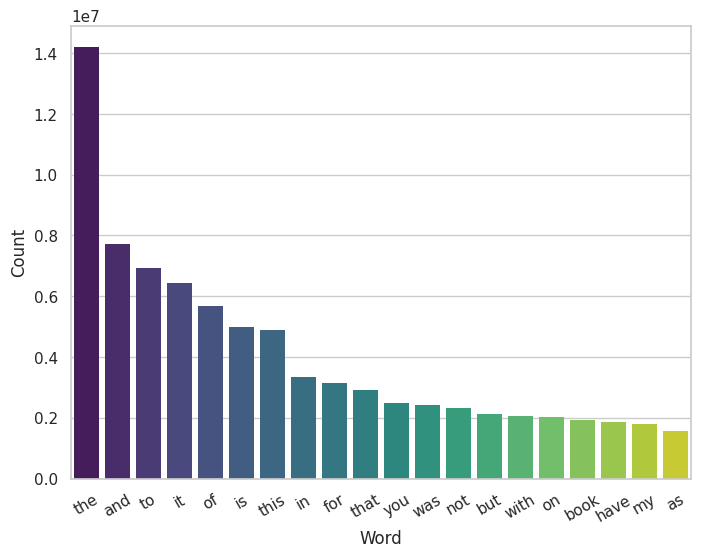

In [ ]:
create_barplot(df,'Word','Count','word','word_count','top_20_words_before_stop_words')